Our generalized function is:
f($\bf{r_i}$) = 1 if $|\bf{r_i}|^2 \leq 1$, 0 otherwise

For example in 3 dimensions it is 1 if $x^2 + y^2 + z^2 \leq 1$, 0 otherwise

And the integral in d dimensions is then $\frac{2^d}{N} \sum_o f(\bf{r_i})$

In [ ]:
#10.7
from numpy import dot,math,pi,random

d = 10
N = 5000000

# Integrand
def f(r):
  if dot(r,r) <= 1:
    return 1
  else:
    return 0

s = 0.0

for i in range(N):
  # Generate random points
  r = 2*random.rand(d) - 1 ## random.random returns a number in the range [0,1] so this transforms it to [-1,1]

  # Add
  s += f(r)

print("I = ",(2**d)*s/N)
print("True answer is ",pi**(d/2)/(math.factorial(d/2)))


I =  2.5987072
True answer is  2.550164039877345


In [ ]:
from numpy import empty,sum,exp,arange,linspace
from random import random, randrange
from matplotlib.pylab import plot,show,imshow


# Function to calculate the energy
def energy(s):
  return -J*(sum(s[0:L-1,:]*s[1:L,:]) + sum(s[:,0:L-1]*s[:,1:L])) - 2*h*sum(s)

def calculate(J, T, N, L,h):

  # Initial state
  s = empty([L,L],int)
  for i in range(L):
    for j in range(L):
      if random() < 0.5:
        s[i,j] = +1
      else:
        s[i,j] = -1
  E = energy(s)
  M = sum(s)
  # Main loop
  xpoints = arange(N)
  Naccept = 1
  Etot = E
  E2tot = E*E
  Mtot = M
  M2tot = M*M

  for k in range(N):

    # Save current energy
    oldE = E

    # Choose a random spin, flip it, and calculate dE
    i = randrange(L)
    j = randrange(L)
    # We could probably be move clever since "most" of the calculation doesn't change, only nearest neighbors
    # So let's try that here. We will flip the spin AFTER after calculating dE, too
    #E = energy(s)
    #deltaE = E - oldE
    #be more careful now about the boundary conditions, too
    iup = i+1
    idown = i-1
    jup = j+1
    jdown = j-1
    if (iup == L): iup = 0
    if (idown == 0): idown = L-1
    if (jup == L): jup = 0
    if (jdown == 0): jdown = L-1
    ### Factor of two comes from (1 - (-1) = 2)
    deltaE = 2*J*s[i,j]*(s[iup,j]+s[idown,j]+s[i,jup]+s[i,jdown]) + 2*h*s[i,j]
    E = deltaE + oldE
    ### Flip!
    s[i,j] = -s[i,j]
    # Decide whether to accept the move or not
    if deltaE > 0.0: ### If dE < 0 we always keep things
      if random() > exp(-deltaE/T): 
        # Move rejected, revert to old state, don't need to recalculate M, we haven't changed it
        s[i,j] = -s[i,j]
        E = oldE
        continue
    # Accepted! Calculate new values
    Naccept = Naccept + 1
    M = sum(s)
    Etot = Etot + E
    E2tot = E2tot + E*E
    Mtot = Mtot + M
    M2tot = M2tot + M*M

  chi = (M2tot-Mtot)/Naccept
  c = (E2tot - Etot)/Naccept
  ## return results
  return(chi,c,Naccept,s)


J = 1.0_T1.1345_h0.0_iter0
J = 1.0_T1.70175_h0.0_iter0
J = 1.0_T2.269_h0.0_iter0
J = 1.0_T3.4035_h0.0_iter0
J = 1.0_T4.538_h0.0_iter0


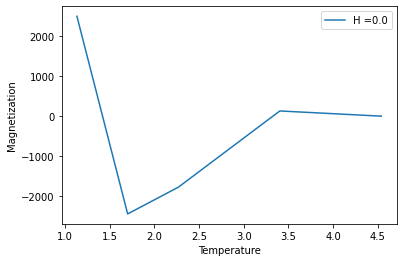

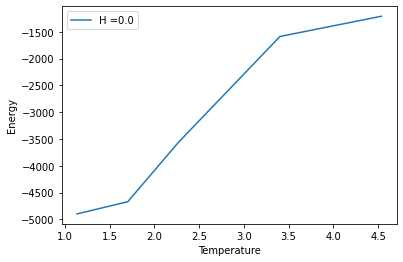

J = 1.0_T1.1345_h1.0_iter0
J = 1.0_T1.70175_h1.0_iter0
J = 1.0_T2.269_h1.0_iter0
J = 1.0_T3.4035_h1.0_iter0
J = 1.0_T4.538_h1.0_iter0


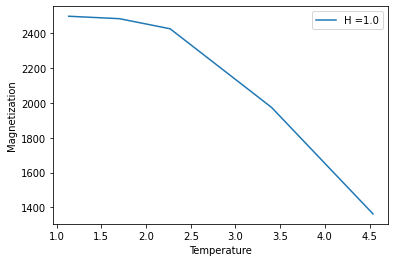

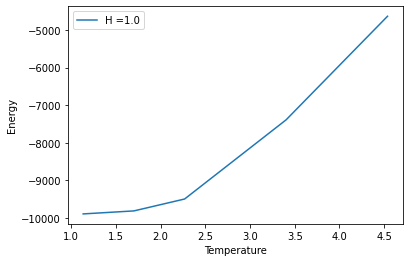

J = 1.0_T1.1345_h0.0_iter0
J = 1.0_T1.70175_h0.0_iter0
J = 1.0_T2.269_h0.0_iter0
J = 1.0_T3.4035_h0.0_iter0
J = 1.0_T4.538_h0.0_iter0
J = 1.0_T1.1345_h1.0_iter0
J = 1.0_T1.70175_h1.0_iter0
J = 1.0_T2.269_h1.0_iter0
J = 1.0_T3.4035_h1.0_iter0
J = 1.0_T4.538_h1.0_iter0


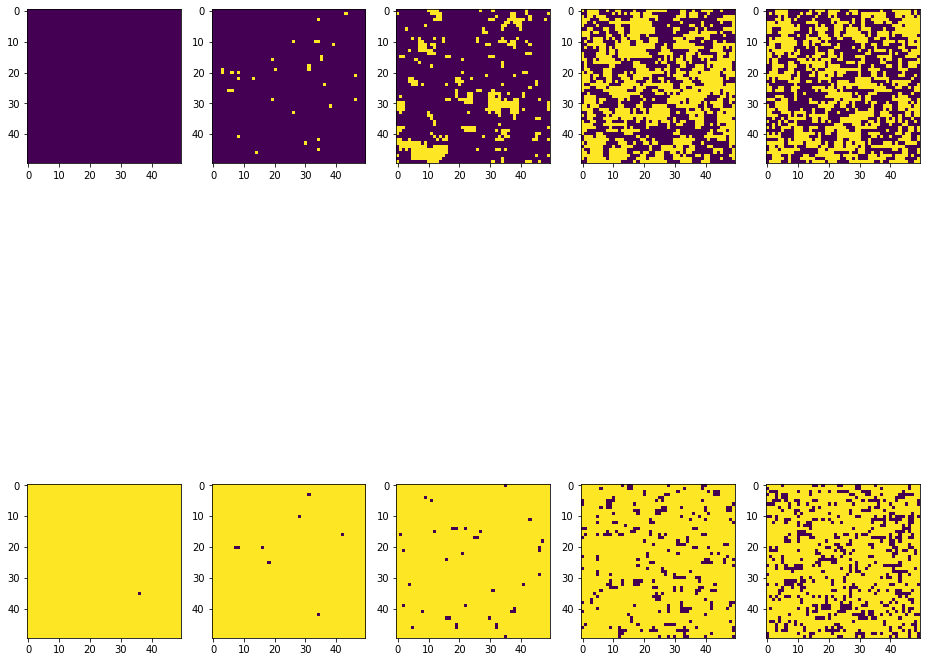

In [ ]:
from matplotlib.pyplot import imshow,figure,subplots,xlabel,ylabel,legend,show

L=50
N=20000000
n = 1
ss=[]
names=[]
for J in [1.0]:
  Tc = 2.269*J
  ts = [0.5*Tc,0.75*Tc,1.0*Tc,1.5*Tc,2.0*Tc]
  for h in [0.0,1.0]:
    mags=[]
    es=[]
    for T in ts:
      for k in range(n):        
        chi,c,Nacceps,s = calculate(J,T,N,L,h)
        es.append(energy(s))
        mags.append(sum(s))
        name = "J = "+str(J)+"_T"+str(T)+"_h"+str(h)+"_iter"+str(k)
        names.append(name)
        print(name)
        ss.append(s)
    plot(ts,mags,label="H ="+str(h))
    xlabel("Temperature")
    ylabel("Magnetization")
    legend()
    show()

    plot(ts,es,label="H ="+str(h))
    xlabel("Temperature")
    ylabel("Energy")
    legend()
    show()


fig = figure(figsize=(16,16))
###f, axarr = subplots(5,2) 
columns = 5
rows = 2
for i in range(1, columns*rows +1):
  print(names[i-1])
  fig.add_subplot(rows, columns, i)
  imshow(ss[i-1])

Yemperatures are across the row in different columns, h = 0 is top row, h = 1 is bottom row.

The overall magnetization is less sensitive to temperature with applied field not zero. And you can see the spontaneous magnetization and domains appearing near and below Tc, but only when h = 0. Note that the sign of the magnetization isn't physical, though it matters when h is not zero!